Visual Question Answering (VQA) involves providing answers to open-ended questions based on the content of an image. Models designed for this task receive an image and a question as inputs and generate an answer in natural language as the output.

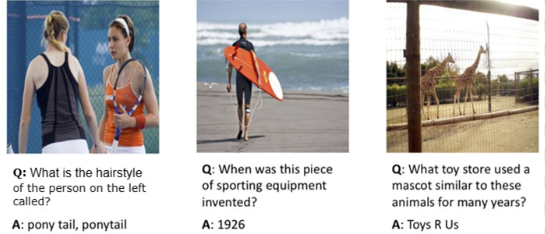

###BLIP-2

BLIP-2 (Bootstrapping Language-Image Pre-training with frozen unimodal models)narrows the gap between vision and language models by incorporating a lightweight Querying Transformer (Q-Former) between a pre-trained, frozen image encoder and a frozen large language model. In BLIP-2, the Q-Former is the only component that is trainable, while both the image encoder and language model remain unchanged.

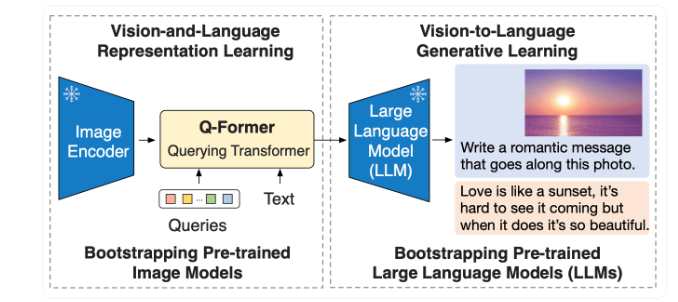

Q-Former is a transformer model composed of two submodules that share the same self-attention layers:

- An image transformer that collaborates with the frozen image encoder to extract visual features.
- A text transformer that functions as both a text encoder and a text decoder.

The image transformer extracts a fixed number of output features from the image encoder, regardless of the input image resolution, and accepts learnable query embeddings as inputs. These queries can also interact with text through the same self-attention layers.

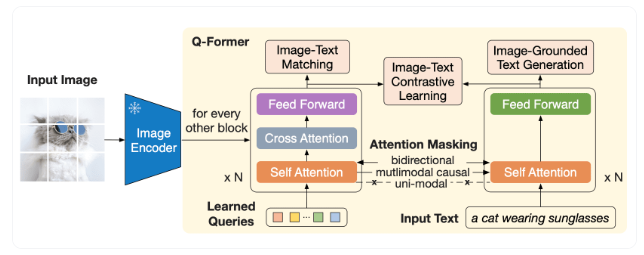

In [1]:
#check GPU is available or not
import torch
print(torch.cuda.is_available())

False


In [2]:
from PIL import Image
import requests
from IPython.display import display
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch
def display_image(url):
  image = Image.open(requests.get(url, stream=True).raw)
  # Display the image
  display(image)
  return image





In [3]:
#load the model
def load_model():
  processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
  model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)
  return model, processor

def generate_visual_qna(task_prompt,image,model,processor ):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)
  inputs = processor(image, text=task_prompt, return_tensors="pt").to(device, torch.float16)
  #generated_ids = model.generate(**inputs, max_new_tokens=10)
  generated_ids = model.generate(input_ids=inputs["input_ids"],
                                   pixel_values=inputs["pixel_values"],max_length=51)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
  return generated_text



In [4]:
model, processor=load_model()

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:991: UserWarning: Not enough free disk space to download the file. The expected file size is: 5497.66 MB. The target location /Users/abhilashchauhan/.cache/huggingface/hub/models--Salesforce--blip2-opt-2.7b/blobs only has 4806.61 MB free disk space.
  warnings.warn(
/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:991: UserWarning: Not enough free disk space to download the file. The expected file size is: 5497.66 MB. The target location /Users/abhilashchauhan/.cache/huggingface/hub/models--Salesforce--blip2-opt-2.7b/blobs only has 4806.60 MB free disk space.
  warnings.warn(


model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

KeyboardInterrupt: 

For visual question answering the prompt has to follow a specific format: "Question: {} Answer:"

In [ ]:
#example 1
url = 'https://i.pinimg.com/736x/d2/5d/bb/d25dbb8d465423c0ffc383d03e59eabd.jpg'
image=display_image(url)

#prompt
task_prompt = "Question: What is the bird holding in its beak? Answer:"
answer = generate_visual_qna(task_prompt,image, model, processor)
print(answer)

In [ ]:
task_prompt = "Question:What type of bird is depicted in the image? Answer:"
answer = generate_visual_qna(task_prompt,image, model, processor)
print(answer)

In [ ]:
#Example 2


url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZWfHSZkhoaCSI7ITx-A3YELK5S8wp8SPQRw43l7I2lB2eaVhs1A6Z3poiAU0NWrTOMEE&usqp=CAU'
image=display_image(url)

#prompt
task_prompt = "Question: What utensil is being used to eat the noodle dish in the image? Answer:"
answer = generate_visual_qna(task_prompt,image, model, processor)
print(answer)

In [ ]:

task_prompt = "Question: How are the eggs prepared in the noodle dish? Answer:"
answer = generate_visual_qna(task_prompt,image, model, processor)
print(answer)